<a href="https://colab.research.google.com/github/Venkata-Suresh-Babu/Banking-Customer-chrun-analysis/blob/main/Banking_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Banking Customer Churn Analysis

Importing the data from url

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('Kaggle_Key')
os.environ["KAGGLE_USERNAME"] = userdata.get('Kaggle_Username')

In [32]:
#!kaggle datasets list

In [33]:
#Download dataset
!kaggle datasets download -d dyutimazumder/banking-customer-churn-analysis

Dataset URL: https://www.kaggle.com/datasets/dyutimazumder/banking-customer-churn-analysis
License(s): unknown
banking-customer-churn-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
!unzip -o /content/banking-customer-churn-analysis.zip

Archive:  /content/banking-customer-churn-analysis.zip
  inflating: Banking Customer Churn Analysis.pbix  
  inflating: Churn Modelling Dataset.csv  


In [35]:
bank = pd.read_csv('/content/Churn Modelling Dataset.csv')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
#changing the exited column values to Yes or No
bank['Exited'] = bank['Exited'].apply(lambda x: 'Yes' if x == 1 else 'No')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


In [37]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [38]:
bank.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [39]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [40]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [41]:
#total customers
total_customers = bank['CustomerId'].count()
print(total_customers)

10000


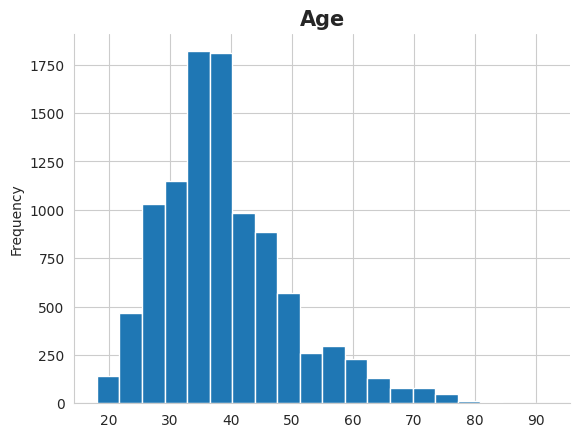

In [42]:
bank['Age'].plot(kind='hist', bins=20)
plt.title('Age',  fontsize = 15, fontweight = 'bold')
plt.gca().spines[['top', 'right',]].set_visible(False)

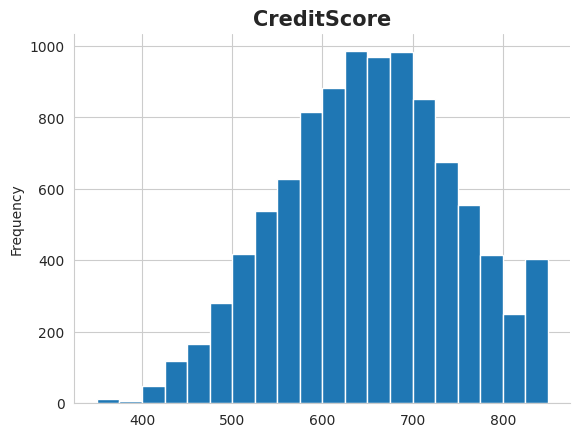

In [43]:
bank['CreditScore'].plot(kind='hist', bins=20)
plt.title('CreditScore',  fontsize = 15, fontweight = 'bold')
plt.gca().spines[['top', 'right',]].set_visible(False)

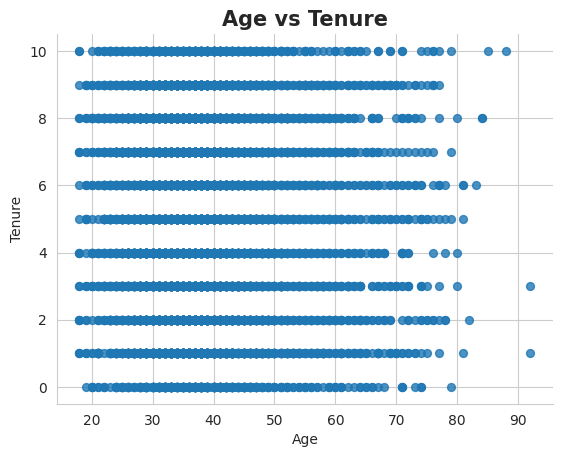

In [44]:
bank.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=0.8)
plt.title('Age vs Tenure',  fontsize = 15, fontweight = 'bold')
plt.gca().spines[['top', 'right',]].set_visible(False)

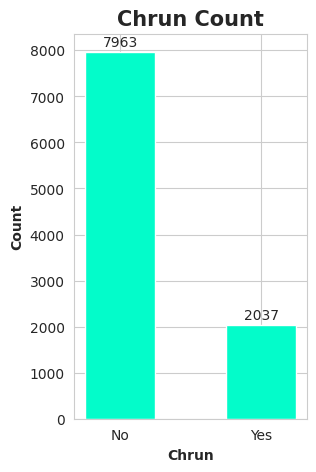

In [45]:
chrun_count = bank.Exited.value_counts()
datalabels = chrun_count.values
plt.figure(figsize=(3, 5))
bars = plt.bar(chrun_count.index, chrun_count.values, color = '#03fcca', width = 0.5)
plt.title('Chrun Count', fontsize = 15, fontweight = 'bold')
plt.xlabel('Chrun', fontsize = 10, fontweight = 'bold')
plt.ylabel('Count', fontsize = 10, fontweight = 'bold')

#data labels
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 50,
           height, ha = 'center', va = 'bottom')
plt.show()

In [46]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


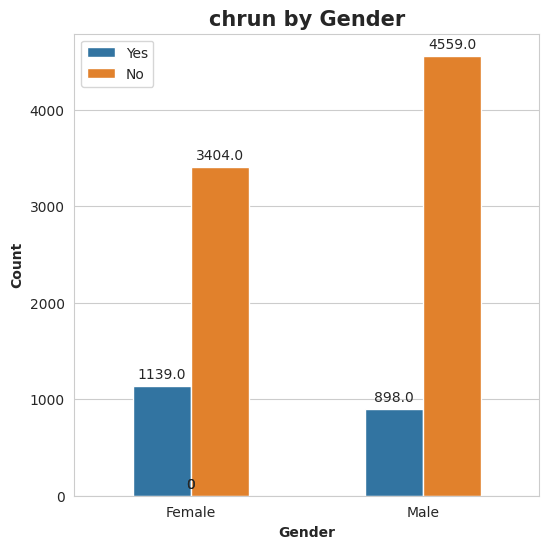

In [47]:
chrun_gender = bank.groupby('Gender')['Exited'].value_counts()
plt.figure(figsize=(6, 6))
plt.title('chrun by Gender', fontsize = 15, fontweight = 'bold')
ax = sns.countplot(x = 'Gender', hue = 'Exited', data = bank, width = 0.5)
plt.xlabel('Gender', fontsize = 10, fontweight = 'bold')
plt.ylabel('Count', fontsize = 10, fontweight = 'bold')
plt.legend()
for p in ax.patches:
  height = p.get_height()
  plt.text(p.get_x() + p.get_width()/2, height + 50,
           height, ha = 'center', va = 'bottom')
plt.show()

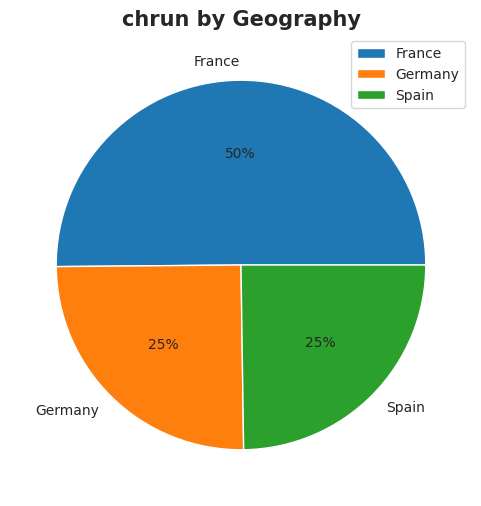

In [48]:
#Plotting by Geography
chrun_geo = bank.groupby('Geography')['Exited'].count()
sns.set_style('whitegrid')
plt.figure(figsize=(6, 6))
plt.pie(chrun_geo, labels=chrun_geo.index, autopct='%.0f%%')
plt.title('chrun by Geography', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.show()

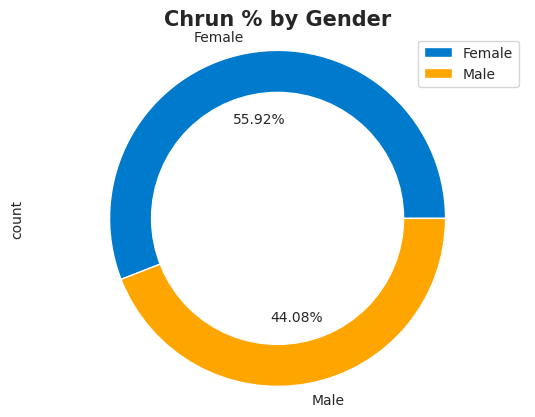

In [49]:
#chrun count by gender
import matplotlib.patches as patches
chrun_percentage = bank[bank['Exited'] == 'Yes']['Gender'].value_counts()
chrun_percentage.plot(kind = 'pie', autopct = '%.2f%%', colors=['#007acc', '#FFA500'])
center_circle = patches.Circle((0, 0), 0.75, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.title('Chrun % by Gender', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.show()

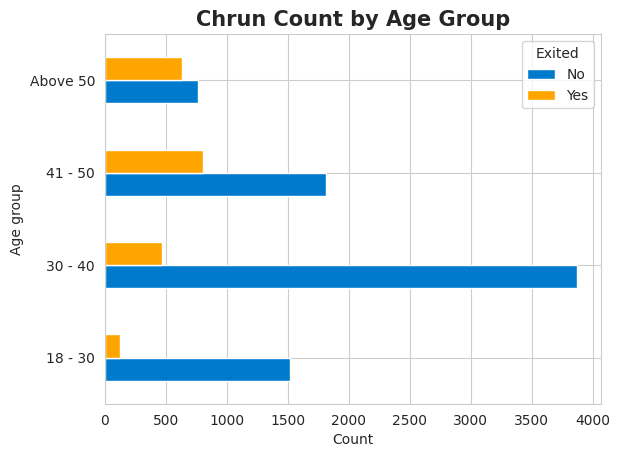

In [50]:
def age_group(age):
  if age >= 18 and age < 30:
    return '18 - 30'
  elif age >= 30 and age < 40:
    return '30 - 40'
  elif age >= 40 and age < 50:
    return '41 - 50'
  else:
    return 'Above 50'

chrun_percentage = bank[bank['Exited'] == 'Yes'].count()
bank['Age_Group'] = bank['Age'].apply(age_group)
age_group = bank.groupby('Age_Group')['Exited'].value_counts().unstack()
age_group.plot(kind = 'barh', color = ['#007acc', '#FFA500'])
plt.title('Chrun Count by Age Group', fontsize = 15, fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Age group')
plt.show()

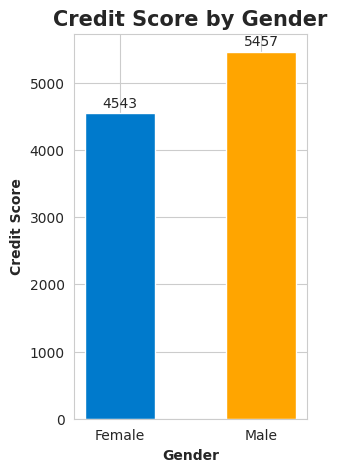

In [51]:
#credit score as per gender
credit_score = bank.groupby('Gender')['CreditScore'].count()

plt.figure(figsize=(3, 5))
bars = plt.bar(credit_score.index, credit_score.values, color = ['#007acc', '#FFA500'], width = 0.5)
plt.xlabel('Gender', fontsize = 10, fontweight = 'bold')
plt.ylabel('Credit Score', fontsize = 10, fontweight = 'bold')
plt.title('Credit Score by Gender', fontsize = 15, fontweight = 'bold')
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 50,
           height, ha = 'center', va = 'bottom')
plt.show()

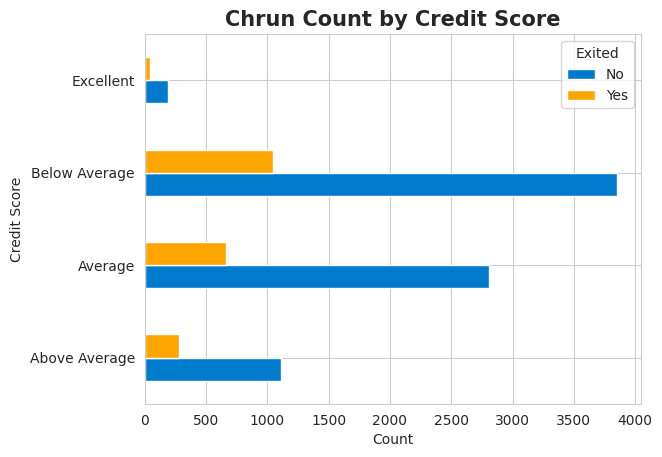

In [52]:
def credit_score(score):
  if score < 650:
    return 'Below Average'
  elif score >= 650 and score < 750:
    return 'Average'
  elif score >= 750 and score < 850:
    return 'Above Average'
  else:
    return 'Excellent'
bank['Credit_Score'] = bank['CreditScore'].apply(credit_score)
credit_score_count = bank.groupby('Credit_Score')['Exited'].value_counts().unstack()
credit_score_count.plot(kind = 'barh', color = ['#007acc', '#FFA500'])
plt.title('Chrun Count by Credit Score', fontsize = 15, fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Credit Score')
plt.show()

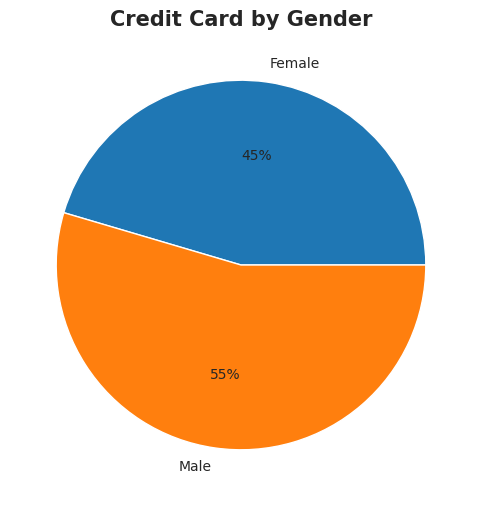

In [53]:
#credit card avaliable as per gender
credit_card = bank.groupby('Gender')['HasCrCard'].count()
plt.figure(figsize=(6, 6))
plt.pie(credit_card, labels=credit_card.index, autopct='%.0f%%')
plt.title('Credit Card by Gender', fontsize = 15, fontweight = 'bold')
plt.show()

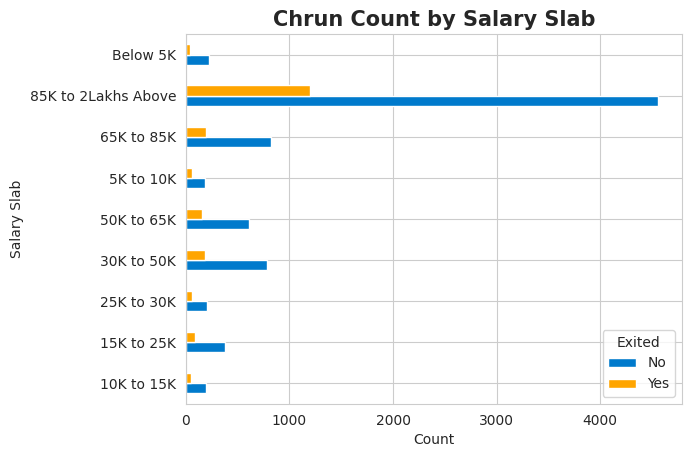

In [54]:
def salary_slab(salary):
  if salary <= 5000:
    return 'Below 5K'
  elif 5000 <= salary <= 9999:
    return '5K to 10K'
  elif 10000 <= salary <= 15000:
    return '10K to 15K'
  elif 15000 <= salary <= 25000:
    return '15K to 25K'
  elif 25000 <= salary <= 30000:
    return '25K to 30K'
  elif 30000 <= salary <= 50000:
    return '30K to 50K'
  elif 50000 <= salary <= 65000:
    return '50K to 65K'
  elif 65000 <= salary <= 85000:
    return '65K to 85K'
  else:
    return '85K to 2Lakhs Above'

#chruned count
chrun_salary = bank[bank['Exited'] == 'Yes'].count()
bank['Salary_Slab'] = bank['EstimatedSalary'].apply(salary_slab)
salary_slab = bank.groupby('Salary_Slab')['Exited'].value_counts().unstack()
salary_slab.plot(kind = 'barh', color = ['#007acc', '#FFA500'])
plt.title('Chrun Count by Salary Slab', fontsize = 15, fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Salary Slab')
plt.show()

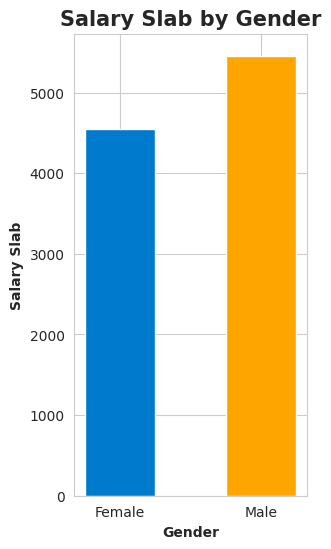

In [55]:
#salary slab according to gender
salary_slab = bank.groupby('Gender')['Salary_Slab'].count()
plt.figure(figsize=(3, 6))
plt.bar(salary_slab.index, salary_slab.values, color = ['#007acc', '#FFA500'], width = 0.5)
plt.xlabel('Gender', fontsize = 10, fontweight = 'bold')
plt.ylabel('Salary Slab', fontsize = 10, fontweight = 'bold')
plt.title('Salary Slab by Gender', fontsize = 15, fontweight = 'bold')
plt.show()

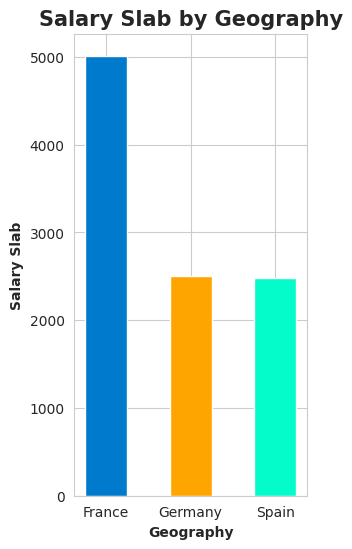

In [56]:
#salary slab according to geography
salary_slab = bank.groupby('Geography')['Salary_Slab'].count()
plt.figure(figsize=(3,6))
plt.bar(salary_slab.index, salary_slab.values, color = ['#007acc', '#FFA500', '#03fcca'], width = 0.5)
plt.xlabel('Geography', fontsize = 10, fontweight = 'bold')
plt.ylabel('Salary Slab', fontsize = 10, fontweight = 'bold')
plt.title('Salary Slab by Geography', fontsize = 15, fontweight = 'bold')
plt.show()